In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
% matplotlib inline

In [2]:
from scikitplot.metrics import plot_confusion_matrix, plot_cumulative_gain, plot_roc
from sklearn.metrics import accuracy_score, mean_squared_error
from fastai.imports import *
from fastai.structured import *

In [77]:
PATH = 'CRM/'

In [87]:
df = pd.read_excel(f'{PATH}270324_Data_for_contest_ADJ.xlsx', sheet_name='Final',na_values=99)

In [79]:
df.head()

,id,buy,sex,age,edu,income,occu_ADJ,memb,REGIS_MEM,REGIS_MEM2,...,cs40_ADJ,cs41_ADJ,cs42_ADJ,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,154,1,1,19,6,2,2,2,2,0,...,2,2,2,0.38595,1.04971,0.84306,-0.44033,0.09504,0.02017,0.41899
1,26,1,2,25,5,2,2,2,2,0,...,2,3,2,-3.39896,0.76810,1.48060,-1.60054,1.52878,-2.04854,1.14870
2,40,1,2,34,5,6,4,1,2,0,...,1,1,1,0.31032,-0.73502,-0.62824,-0.24851,0.37170,-0.45850,-1.03090
3,47,1,2,25,5,3,2,2,2,0,...,2,3,0,1.33626,-0.93838,0.49841,-1.12707,0.88446,0.76287,-3.89103
4,78,1,2,28,5,5,4,2,2,0,...,0,1,1,-1.00882,-1.28489,1.52607,-4.99777,0.38939,-1.27208,1.69595


In [75]:
x.columns

Index(['sex', 'age', 'edu', 'income', 'occu_ADJ', 'type1_ADJ', 'ocs1_ADJ',
       'ocs2_ADJ', 'ocs3_ADJ', 'ocs4_ADJ', 'ocs5_ADJ', 'PCA_1', 'PCA_2',
       'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7'],
      dtype='object')

In [88]:
drop = ['id', 'buy', 'REGIS_MEM', 'REGIS_MEM2', 'cs1_ADJ', 'cs2_ADJ', 'cs3_ADJ',
       'cs4_ADJ', 'cs5_ADJ', 'cs6_ADJ', 'cs7_ADJ', 'cs8_ADJ', 'cs9_ADJ',
       'cs10_ADJ', 'cs11_ADJ', 'cs12_ADJ', 'cs13_ADJ', 'cs14_ADJ', 'cs15_ADJ',
       'cs16_ADJ', 'cs17_ADJ', 'cs18_ADJ', 'cs19_ADJ', 'cs20_ADJ', 'cs21_ADJ',
       'cs22_ADJ', 'cs23_ADJ', 'cs24_ADJ', 'cs25_ADJ', 'cs26_ADJ', 'cs27_ADJ',
       'cs28_ADJ', 'cs29_ADJ', 'cs30_ADJ', 'cs31_ADJ', 'cs32_ADJ', 'cs33_ADJ',
       'cs34_ADJ', 'cs35_ADJ', 'cs36_ADJ', 'cs37_ADJ', 'cs38_ADJ', 'cs39_ADJ',
       'cs40_ADJ', 'cs41_ADJ', 'cs42_ADJ', 'ocs1_ADJ',
       'ocs2_ADJ', 'ocs3_ADJ', 'ocs4_ADJ', 'ocs5_ADJ',]

In [89]:
xt = df.drop(drop, axis = 1)
x = df.drop(drop, axis = 1)
y = df.REGIS_MEM2
x_mem = x[x.memb == 1]
y_mem = df.REGIS_MEM2[df.memb == 1]
x_notmem = x[x.memb == 2]
y_notmem = df.REGIS_MEM2[df.memb == 2]

In [90]:
x.drop(['memb', 'frequen_ADJ'], axis=1, inplace=True)
x_mem.drop(['memb', 'frequen_ADJ'], axis=1, inplace=True)
x_notmem.drop(['memb', 'frequen_ADJ'],axis=1, inplace=True)

C:\Users\Bestz\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Accuracy score:  0.6961038961038961


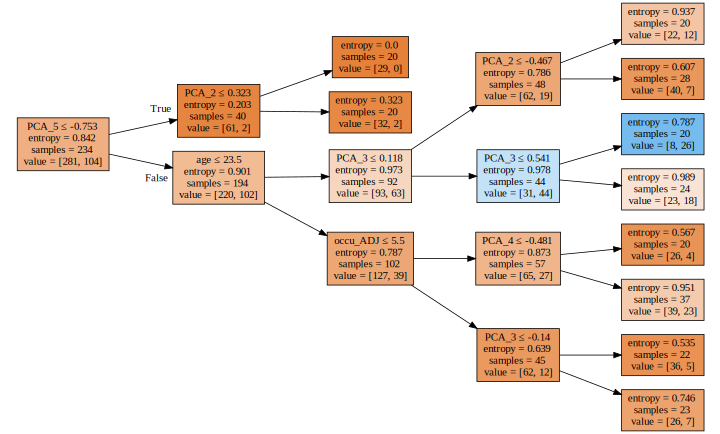

In [91]:
test = RandomForestClassifier(n_estimators=1,min_samples_leaf=20, max_features=0.6, criterion='entropy', )
test.fit(x, y)
test_pred = test.predict(x)
print("Accuracy score: ", accuracy_score(y, test_pred))
draw_tree(test.estimators_[0], x, precision=3)

In [62]:
acc_score = []
oob_score = []
for i in np.arange(1,200,1):
    model = RandomForestClassifier(n_estimators=i, min_samples_leaf=12, max_features=0.5, oob_score=True)
    model.fit(x,y)
    pre = model.predict(x)
    acc = accuracy_score(y, pre)
    acc_score.append(acc)
    oob = model.oob_score_
    oob_score.append(oob)

C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Bestz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

Text(0.5,1,'OOB Score plot')

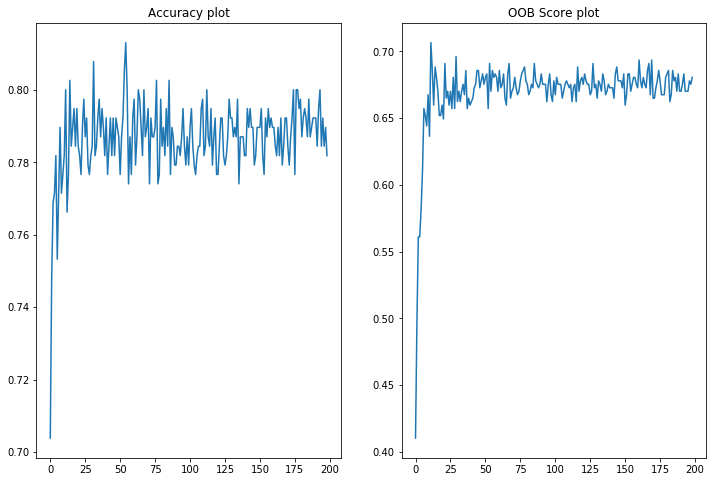

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 8))
ax1.plot(acc_score)
ax1.set_title('Accuracy plot')
ax2.plot(oob_score)
ax2.set_title('OOB Score plot')

In [103]:
logis = LogisticRegression()
logis.fit(x, y)
print('R^2: ', logis.score(x, y))
co = pd.DataFrame(logis.coef_, columns=cols); co

R^2:  0.7064935064935065


,sex,age,edu,income,occu_ADJ,type1_ADJ,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.301072,0.005557,-0.205773,0.233346,-0.071443,-0.20704,0.14045,0.206611,0.456327,-0.017831,0.269925,0.094708,0.079715


In [102]:
x.columns

Index(['sex', 'age', 'edu', 'income', 'occu_ADJ', 'type1_ADJ', 'PCA_1',
       'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7'],
      dtype='object')

In [105]:
drop2 = ['sex', 'age', 'edu', 'income', 'occu_ADJ', 'type1_ADJ']
x22 = x.drop(drop2, axis=1)
logis2 = LogisticRegression()
logis2.fit(x22, y)
print('R^2: ', logis2.score(x22, y))
co2 = pd.DataFrame(logis2.coef_, columns=x22.columns); co2

R^2:  0.7038961038961039


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,0.143772,0.167497,0.369373,-0.027364,0.267601,0.082167,0.128659


Accuracy score:  0.7948051948051948
Oob score:  0.6597402597402597


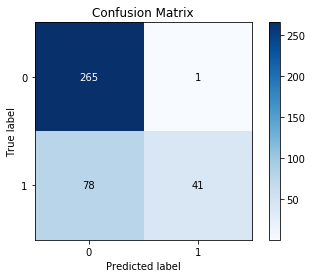

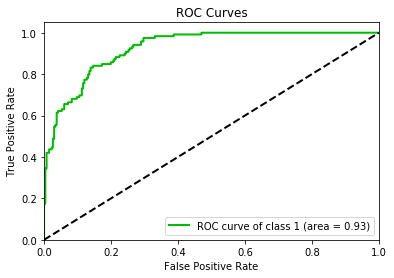

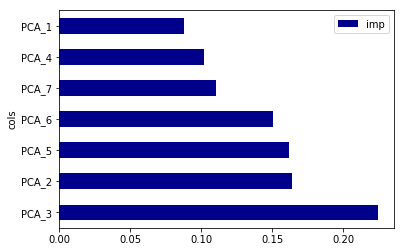

In [109]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_features=0.5, oob_score=True,
                           criterion='entropy')
m.fit(x22, y)
pred = m.predict(x22)
score = m.predict_proba(x22)
plot_confusion_matrix(y, pred)
print("Accuracy score: ", accuracy_score(y, pred))
print("Oob score: ", m.oob_score_)
plot_roc(y, score,plot_micro=False, plot_macro=False, classes_to_plot=1)
fi1 = rf_feat_importance(m, x22)
fi1[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

Accuracy score:  0.7766233766233767
Oob score:  0.6779220779220779


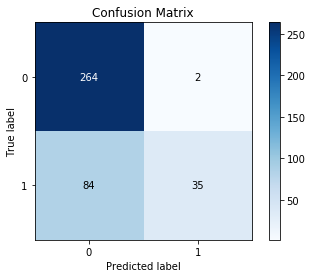

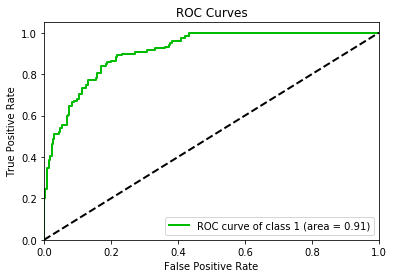

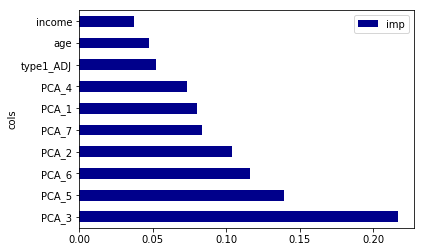

In [92]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=12, max_features=0.5, oob_score=True,
                           criterion='entropy')
m.fit(x, y)
pred = m.predict(x)
score = m.predict_proba(x)
plot_confusion_matrix(y, pred)
print("Accuracy score: ", accuracy_score(y, pred))
print("Oob score: ", m.oob_score_)
plot_roc(y, score,plot_micro=False, plot_macro=False, classes_to_plot=1)
fi1 = rf_feat_importance(m, x)
fi1[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

Accuracy score:  0.8833333333333333
Oob score:  0.7833333333333333


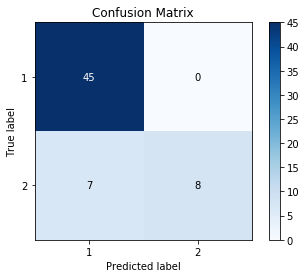

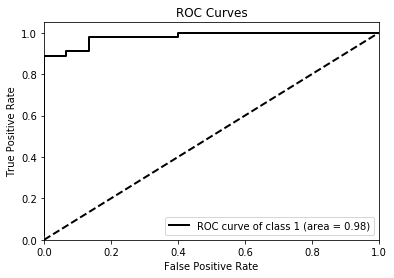

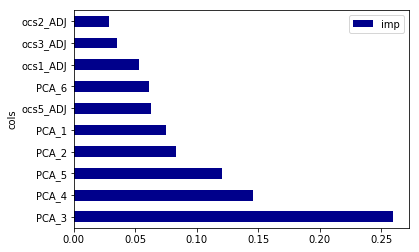

In [48]:
m2 = RandomForestClassifier(n_estimators=300, min_samples_leaf=7, random_state=123, max_features=0.5, oob_score=True,
                           criterion='entropy')
m2.fit(x_mem, y_mem)
pred2 = m2.predict(x_mem)
score2 = m2.predict_proba(x_mem)
plot_confusion_matrix(y_mem, pred2)
print("Accuracy score: ", accuracy_score(y_mem, pred2))
print("Oob score: ", m2.oob_score_)
plot_roc(y_mem, score2,plot_micro=False, plot_macro=False, classes_to_plot=1)
fi2 = rf_feat_importance(m2, x_mem)
fi2[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

Accuracy score:  0.8276923076923077
Oob score:  0.7661538461538462


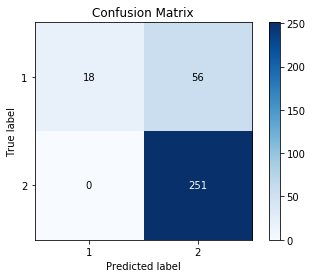

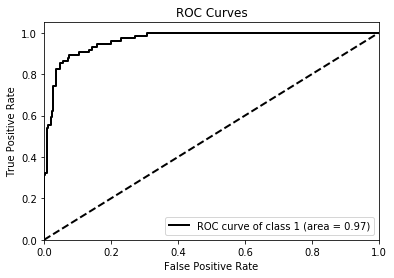

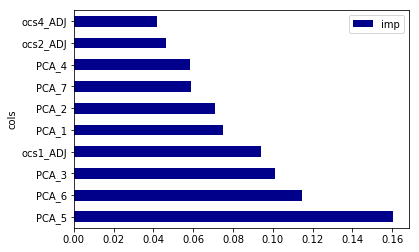

In [32]:
m3 = RandomForestClassifier(n_estimators=200, random_state=123, max_features=0.5,min_impurity_decrease=0.02, oob_score=True,
                           criterion='entropy')
m3.fit(x_notmem, y_notmem)
pred3 = m3.predict(x_notmem)
score3 = m3.predict_proba(x_notmem)
plot_confusion_matrix(y_notmem, pred3)
print("Accuracy score: ", accuracy_score(y_notmem, pred3))
print("Oob score: ", m3.oob_score_)
plot_roc(y_notmem, score3,plot_micro=False, plot_macro=False, classes_to_plot=1)
fi3 = rf_feat_importance(m3, x_notmem)
fi3[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

cs42 -> การส่งเสริมการขาย
ocs1 -> ความพึงพอใจโดยรวมข้อ 1
ocs4 -> ระดับความชอบใจจากการซื้อหนังสือร้าน ABC
ocs2 -> ความพึงพอใจโดยรวมข้อ 1
cs34 -> การมีสินค้าอื่นๆ เช่น ผลิตภัณฑ์ชีวจิต

In [65]:
df_freq = df[df.frequen_ADJ < 7]

In [66]:
df_freq.frequen_ADJ.value_counts()

0    124
1     96
2     70
3     38
4     18
5     15
6      4
Name: frequen_ADJ, dtype: int64

In [67]:
xt = df_freq.drop(drop, axis = 1)
xs = xt.drop(['frequen_ADJ','memb'], axis=1)
ys = df_freq.frequen_ADJ

MSE:  1.4063168430103772
0.3430327037629829


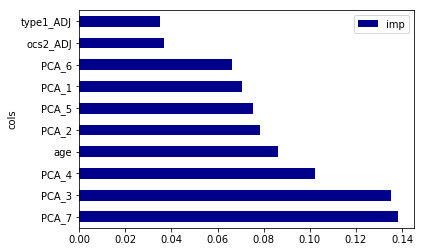

In [68]:
m4 = RandomForestRegressor(n_estimators=200, min_samples_leaf=10, max_features=0.5)
m4.fit(xs, ys)
pred4 = m4.predict(xs)
print('MSE: ', mean_squared_error(ys, pred4))
print(m4.score(xs, ys))
fi4 = rf_feat_importance(m4, xs)
fi4[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

MSE:  3.831985844565663


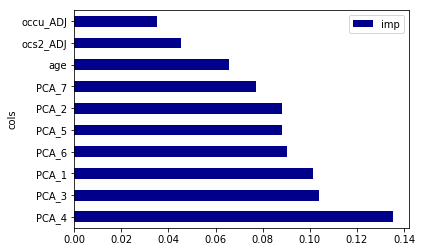

In [72]:
m4 = RandomForestRegressor(n_estimators=300, min_samples_leaf=5, random_state=123, max_features=0.5, oob_score=True)
m4.fit(xs, ys)
pred4 = m4.predict(xs)
print('MSE: ', mean_squared_error(ys, pred4))
fi4 = rf_feat_importance(m4, xs)
fi4[:10].plot('cols', 'imp', 'barh', color = 'darkblue')

In [41]:
predic = [ys, pd.DataFrame(pred4)]
predic = pd.concat(predic, axis=1)

In [69]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [64]:
m10 = LinearRegression()
m10.fit(xs,ys)
pred10 = m10.predict(xs)
print('MSE: ', mean_squared_error(ys, pred10))
m10.coef_
print(m10.score(xs, ys))

MSE:  2.369688901129421
0.08713472332229033


In [82]:
xs.columns

Index(['buy', 'sex', 'age', 'edu', 'income', 'occu_ADJ', 'type1_ADJ',
       'ocs1_ADJ', 'ocs2_ADJ', 'ocs3_ADJ', 'ocs4_ADJ', 'ocs5_ADJ', 'PCA_1',
       'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7'],
      dtype='object')

In [50]:
predic.head(20)

,frequen_ADJ,0
0,1,1.623047
1,2,2.084994
2,10,2.938158
3,2,1.935317
4,0,1.567439
5,4,2.538291
6,2,2.810531
7,1,2.067240
8,1,1.473967
9,1,1.729619


In [133]:
x.columns

Index(['buy', 'sex', 'age', 'edu', 'income', 'occu_ADJ', 'type1_ADJ',
       'frequen_ADJ', 'ocs1_ADJ', 'ocs2_ADJ', 'ocs3_ADJ', 'ocs4_ADJ',
       'ocs5_ADJ', 'cs1_ADJ', 'cs2_ADJ', 'cs3_ADJ', 'cs4_ADJ', 'cs5_ADJ',
       'cs6_ADJ', 'cs7_ADJ', 'cs8_ADJ', 'cs9_ADJ', 'cs10_ADJ', 'cs11_ADJ',
       'cs12_ADJ', 'cs13_ADJ', 'cs14_ADJ', 'cs15_ADJ', 'cs16_ADJ', 'cs17_ADJ',
       'cs18_ADJ', 'cs19_ADJ', 'cs20_ADJ', 'cs21_ADJ', 'cs22_ADJ', 'cs23_ADJ',
       'cs24_ADJ', 'cs25_ADJ', 'cs26_ADJ', 'cs27_ADJ', 'cs28_ADJ', 'cs29_ADJ',
       'cs30_ADJ', 'cs31_ADJ', 'cs32_ADJ', 'cs33_ADJ', 'cs34_ADJ', 'cs35_ADJ',
       'cs36_ADJ', 'cs37_ADJ', 'cs38_ADJ', 'cs39_ADJ', 'cs40_ADJ', 'cs41_ADJ',
       'cs42_ADJ'],
      dtype='object')

## Try creating PCA for preference variables

In [134]:
xa = x.iloc[:,13:]

In [138]:
xa.columns

Index(['cs1_ADJ', 'cs2_ADJ', 'cs3_ADJ', 'cs4_ADJ', 'cs5_ADJ', 'cs6_ADJ',
       'cs7_ADJ', 'cs8_ADJ', 'cs9_ADJ', 'cs10_ADJ', 'cs11_ADJ', 'cs12_ADJ',
       'cs13_ADJ', 'cs14_ADJ', 'cs15_ADJ', 'cs16_ADJ', 'cs17_ADJ', 'cs18_ADJ',
       'cs19_ADJ', 'cs20_ADJ', 'cs21_ADJ', 'cs22_ADJ', 'cs23_ADJ', 'cs24_ADJ',
       'cs25_ADJ', 'cs26_ADJ', 'cs27_ADJ', 'cs28_ADJ', 'cs29_ADJ', 'cs30_ADJ',
       'cs31_ADJ', 'cs32_ADJ', 'cs33_ADJ', 'cs34_ADJ', 'cs35_ADJ', 'cs36_ADJ',
       'cs37_ADJ', 'cs38_ADJ', 'cs39_ADJ', 'cs40_ADJ', 'cs41_ADJ', 'cs42_ADJ'],
      dtype='object')

In [59]:
p = []
for i in range(1, 8):
    p.append(f'PCA_{i}')

In [60]:
xaa = pd.DataFrame(xa_adj, columns=p)

In [62]:
new_x = x.iloc[:,:8]

In [63]:
new_xx = [new_x, xaa]

In [64]:
result = pd.concat(new_xx, axis = 1)

In [65]:
result.head()

,buy,sex,age,edu,income,occu_ADJ,type1_ADJ,frequen_ADJ,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,1,1,19,6,2,2,2,1,-3.491200,0.650794,2.685149,-1.621976,0.195565,-0.309848,-1.736136
1,1,2,25,5,2,2,1,2,4.914882,1.453001,0.305249,5.097330,-1.003333,-3.551786,-1.164029
2,1,2,34,5,6,4,1,10,4.032669,-0.193170,0.834782,-1.518029,1.274864,-0.397616,0.730780
3,1,2,25,5,3,2,6,2,2.993546,0.151702,0.060272,-4.870799,3.642451,-1.428548,-0.885893
4,1,2,28,5,5,4,2,0,9.789321,-2.866166,-1.744094,2.633326,0.766504,-1.904772,-3.617069


## Try fitting Random Forest again with PCAs Variables

In [66]:
ab = pca.components_.T* np.sqrt(pca.explained_variance_)

In [67]:
ab = pd.DataFrame(ab)

In [196]:
ab.to_csv('loading2.csv')

In [70]:
import statsmodels
from statsmodels.multivariate.pca import PCA as pc

In [148]:
pcccc = pc(xa, standardize=False, ncomp=3,demean=True, normalize=True)

In [93]:
pcccc.loadings.to_csv('loading.csv')

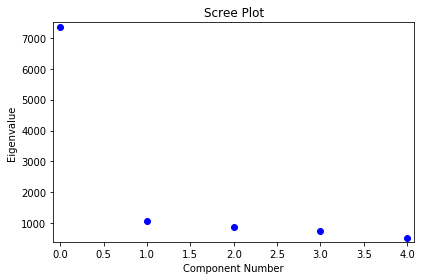

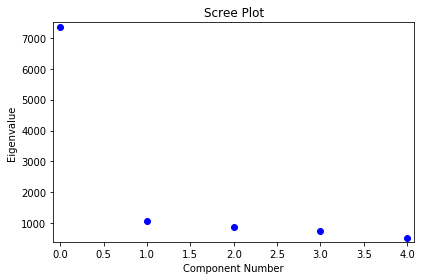

In [140]:
pcccc.plot_scree(ncomp=5, log_scale=False)

In [149]:
pcccc.loadings

,comp_0,comp_1,comp_2
cs1_ADJ,-0.170394,-0.282641,0.093975
cs2_ADJ,-0.159530,-0.282754,0.108326
cs3_ADJ,-0.158993,-0.206198,0.126577
cs4_ADJ,-0.149961,-0.139488,0.078547
cs5_ADJ,-0.155697,-0.175401,0.093045
cs6_ADJ,-0.155706,-0.213840,0.082681
cs7_ADJ,-0.149188,-0.203077,0.060928
cs8_ADJ,-0.156837,-0.310593,0.090992
cs9_ADJ,-0.149683,-0.169350,0.078903
cs10_ADJ,-0.147649,-0.174156,0.025593


In [80]:
xaaa = pcccc.factors

In [83]:
newx = [x, xaaa]
result2 = pd.concat(newx, axis = 1)

In [89]:
drop = result2.iloc[:,8:55].columns

In [ ]:
drop = result2

In [91]:
x_final = result2.drop(drop, axis=1)

Accuracy score:  0.8025974025974026
Oob score:  0.7090909090909091


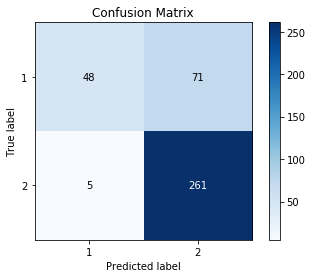

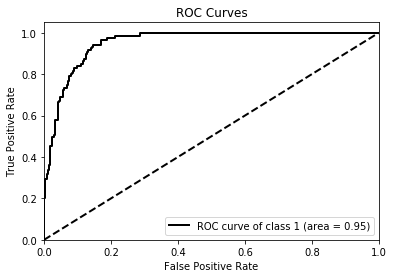

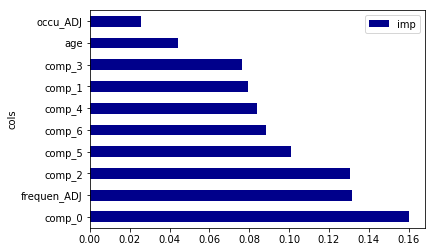

In [131]:
m4 = RandomForestClassifier(n_estimators=200, min_samples_leaf=10, random_state=123, max_features=0.4, oob_score=True,
                           criterion='entropy')
m4.fit(x_final, y)
pred4 = m4.predict(x_final)
score4 = m4.predict_proba(x_final)
plot_confusion_matrix(y, pred4)
print("Accuracy score: ", accuracy_score(y, pred4))
print("Oob score: ", m4.oob_score_)
plot_roc(y, score4,plot_micro=False, plot_macro=False, classes_to_plot=1)
fi4 = rf_feat_importance(m4, x_final)
fi4[:10].plot('cols', 'imp', 'barh', color = 'darkblue')